In [145]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 폰트 설정
font_path='/System/Library/Fonts/AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
plt.rcParams['axes.unicode_minus'] = False

# 데이터 가져오기

In [146]:
import pandas as pd

data_path = "./stress_train.csv"
df = pd.read_csv(data_path)

df = df.drop('ID', axis=1)

target_col = 'stress_score'
non_feature_cols = [target_col]
for col in df.columns:
    if df[col].dtype == object and df[col].nunique() == df.shape[0]:
        non_feature_cols.append(col)


X = df.drop(non_feature_cols, axis=1)
y = df[target_col]

df = X


# 결측치 처리 및 범주형 변환

In [147]:
from sklearn.calibration import LabelEncoder


df_copy = df.copy()

# medical_history와 family_medical_history의 NaN 값을 "healthy"로 채우기
df_copy['medical_history'] = df_copy['medical_history'].fillna('healthy')
df_copy['family_medical_history'] = df_copy['family_medical_history'].fillna('healthy')

#mean_working NaN은 0으로
df_copy['mean_working'] = df_copy['mean_working'].fillna(0)

df_copy['edu_level'] = df_copy['edu_level'].fillna('middle school diploma')

# activity 칼럼을 의미있는 숫자로 변환 (활동 강도에 따라)
# light: 1 (가벼운 활동), moderate: 2 (보통 활동), intense: 3 (격렬한 활동)
activity_mapping = {
    'light': 1,
    'moderate': 2, 
    'intense': 3
}
df_copy['activity'] = df_copy['activity'].map(activity_mapping)

# smoke_status 칼럼을 의미있는 숫자로 변환 (건강 위험도에 따라)
smoke_mapping = {
    'non-smoker': 0,
    'ex-smoker': 1,
    'current-smoker': 2
}
print("smoke status")
print(df_copy['smoke_status'].value_counts())
df_copy['smoke_status'] = df_copy['smoke_status'].map(smoke_mapping)
print(df_copy['smoke_status'].value_counts())
# sleep_pattern 칼럼을 의미있는 숫자로 변환 (수면 질에 따라)
# normal: 0 (정상 수면), sleep difficulty: 1 (수면 장애), oversleeping: 2 (과다 수면)

sleep_mapping = {
    'normal': 3,
    'sleep difficulty': 1,
    'oversleeping': 2
}
df_copy['sleep_pattern'] = df_copy['sleep_pattern'].map(sleep_mapping)

edu_mapping = {
    'middle school diploma': 1,
    'high school diploma': 2,
    'bachelors degree': 3,
    'graduate degree': 4
}
df_copy['edu_level'] = df_copy['edu_level'].map(edu_mapping)


# 범주형 컬럼 확인
categorical_cols = df_copy.select_dtypes(include=['object']).columns.tolist()
print(f"변환할 범주형 컬럼: {categorical_cols}")

# LabelEncoder를 사용하여 각 범주형 컬럼을 숫자로 변환
label_encoders = {}

for col in categorical_cols:
    print(f"\n{col} 컬럼 변환:")
    print(f"변환 전 값들: {df_copy[col].unique()}")
    
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])
    label_encoders[col] = le
    
    print(f"변환 후 값들: {df_copy[col].unique()}")
    print(f"매핑: {dict(zip(le.classes_, le.transform(le.classes_)))}")

df_copy.head()

df = df_copy



smoke status
smoke_status
ex-smoker         1177
non-smoker        1039
current-smoker     784
Name: count, dtype: int64
smoke_status
1    1177
0    1039
2     784
Name: count, dtype: int64
변환할 범주형 컬럼: ['gender', 'medical_history', 'family_medical_history']

gender 컬럼 변환:
변환 전 값들: ['F' 'M']
변환 후 값들: [0 1]
매핑: {'F': 0, 'M': 1}

medical_history 컬럼 변환:
변환 전 값들: ['high blood pressure' 'healthy' 'diabetes' 'heart disease']
변환 후 값들: [3 1 0 2]
매핑: {'diabetes': 0, 'healthy': 1, 'heart disease': 2, 'high blood pressure': 3}

family_medical_history 컬럼 변환:
변환 전 값들: ['diabetes' 'healthy' 'high blood pressure' 'heart disease']
변환 후 값들: [0 1 3 2]
매핑: {'diabetes': 0, 'healthy': 1, 'heart disease': 2, 'high blood pressure': 3}


In [148]:
# 남은 범주형 컬럼들을 숫자로 변환
from sklearn.preprocessing import LabelEncoder

# 범주형 컬럼 확인
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"변환할 범주형 컬럼: {categorical_cols}")

# LabelEncoder를 사용하여 각 범주형 컬럼을 숫자로 변환
label_encoders = {}

for col in categorical_cols:
    print(f"\n{col} 컬럼 변환:")
    print(f"변환 전 값들: {df[col].unique()}")
    
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
    print(f"변환 후 값들: {df[col].unique()}")
    print(f"매핑: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\n최종 데이터 확인:")
print("모든 컬럼 데이터 타입:")
print(df.dtypes)
print(f"\n범주형 컬럼 개수: {len(df.select_dtypes(include=['object']).columns)}")
print(f"수치형 컬럼 개수: {len(df.select_dtypes(include=['number']).columns)}")

df.head()

변환할 범주형 컬럼: []

최종 데이터 확인:
모든 컬럼 데이터 타입:
gender                        int64
age                           int64
height                      float64
weight                      float64
cholesterol                 float64
systolic_blood_pressure       int64
diastolic_blood_pressure      int64
glucose                     float64
bone_density                float64
activity                      int64
smoke_status                  int64
medical_history               int64
family_medical_history        int64
sleep_pattern                 int64
edu_level                     int64
mean_working                float64
dtype: object

범주형 컬럼 개수: 0
수치형 컬럼 개수: 16


,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working
0,0,72,161.49,58.47,279.84,165,100,143.35,0.87,2,1,3,0,1,3,0.0
1,1,88,179.87,77.60,257.37,178,111,146.94,0.07,2,1,1,0,3,4,0.0
2,1,47,182.47,89.93,226.66,134,95,142.61,1.18,1,1,1,1,3,2,9.0
3,1,69,185.78,68.63,206.74,158,92,137.26,0.48,3,1,3,1,2,4,0.0
4,0,81,164.63,71.53,255.92,171,116,129.37,0.34,2,1,0,0,1,3,0.0


수치형 컬럼 (16개): ['gender', 'age', 'height', 'weight', 'cholesterol', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'glucose', 'bone_density', 'activity', 'smoke_status', 'medical_history', 'family_medical_history', 'sleep_pattern', 'edu_level', 'mean_working']
범주형 컬럼 (0개): []


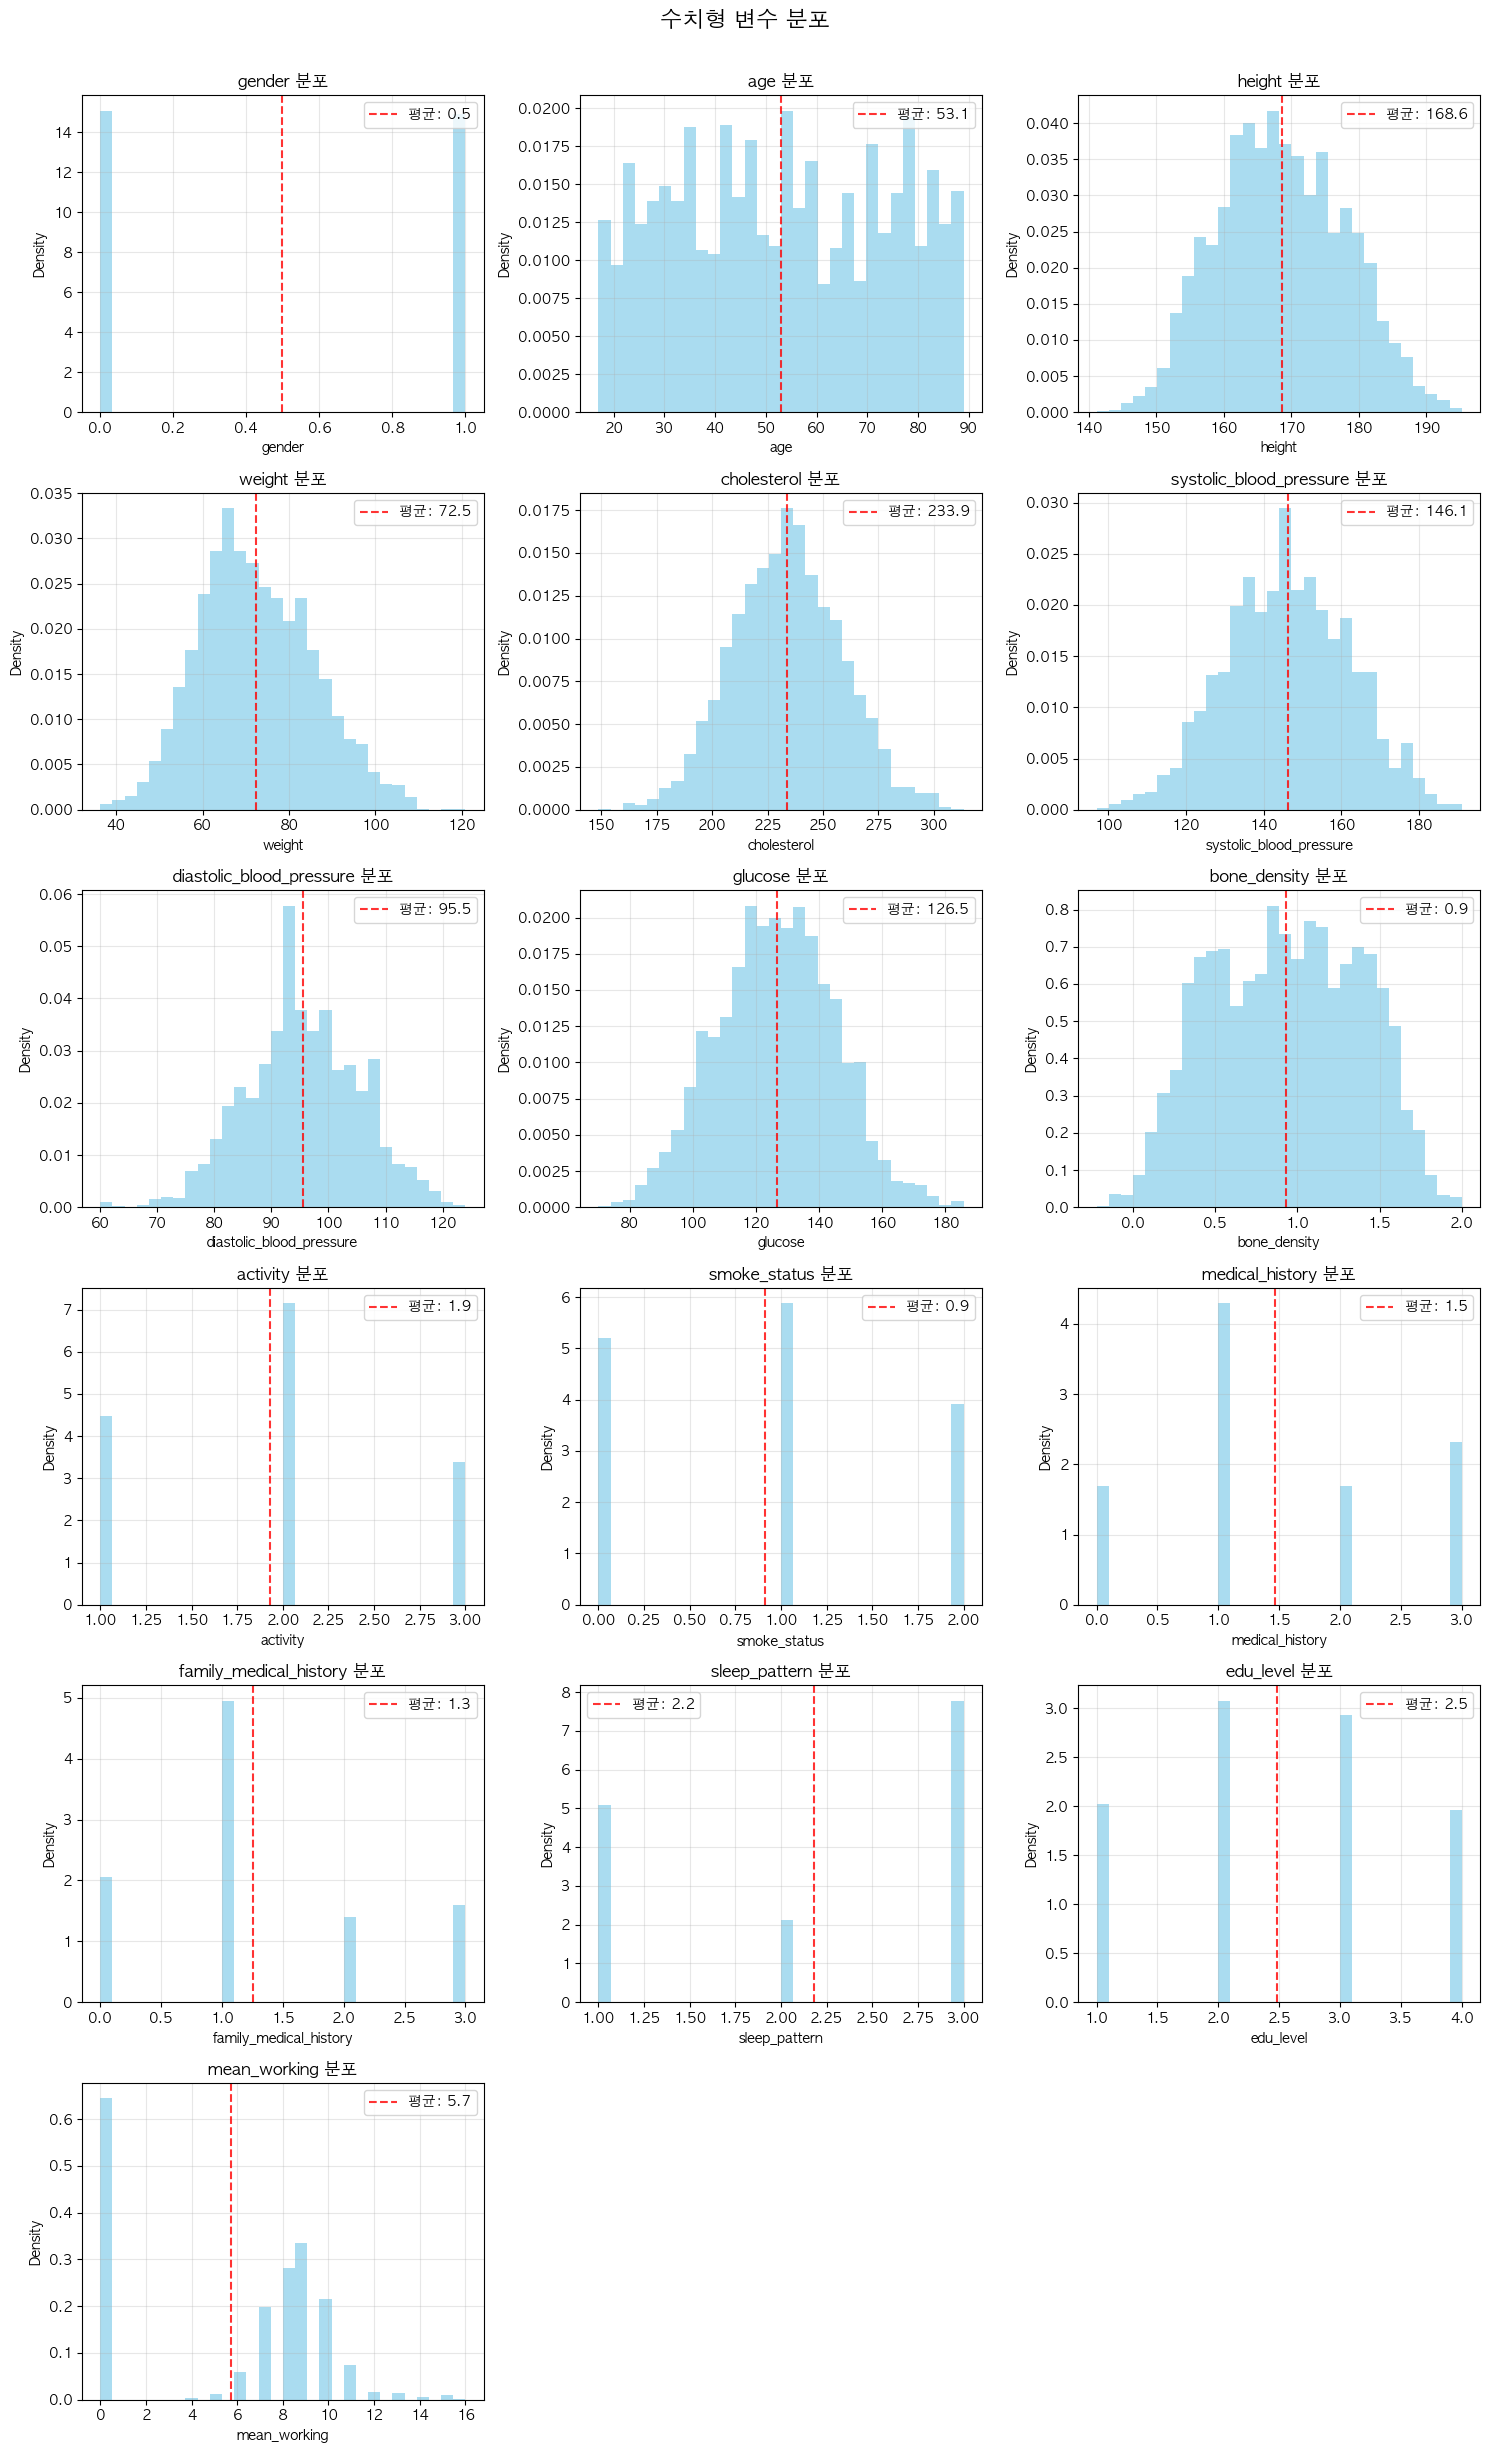


데이터셋 기본 정보
전체 샘플 수: 3000
전체 컬럼 수: 16
전체 결측값 개수: 0
결측값이 있는 컬럼: 없음

수치형 변수 기본 통계:
--------------------------------------------------
       gender      age   height   weight  cholesterol  \
count  3000.0  3000.00  3000.00  3000.00      3000.00   
mean      0.5    53.07   168.59    72.49       233.91   
std       0.5    20.67     9.35    13.17        24.33   
min       0.0    17.00   141.13    36.32       148.81   
25%       0.0    35.00   161.80    63.04       216.93   
50%       0.0    53.00   168.12    71.24       234.26   
75%       1.0    72.00   175.35    81.83       250.38   
max       1.0    89.00   195.28   120.88       313.35   

       systolic_blood_pressure  diastolic_blood_pressure  glucose  \
count                  3000.00                    3000.0  3000.00   
mean                    146.14                      95.5   126.47   
std                      15.85                       9.9    18.54   
min                      97.00                      60.0    70.05   
25%      

In [149]:
# 각 컬럼의 데이터 분포 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 원본 데이터프레임 사용 (인코딩 전)
df_original = df.copy()

# 수치형과 범주형 컬럼 분리
numeric_cols = df_original.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_original.select_dtypes(include=['object']).columns.tolist()

print(f"수치형 컬럼 ({len(numeric_cols)}개): {numeric_cols}")
print(f"범주형 컬럼 ({len(categorical_cols)}개): {categorical_cols}")

# 1. 수치형 변수 분포 시각화
if numeric_cols:
    n_numeric = len(numeric_cols)
    cols = 3
    rows = (n_numeric + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(numeric_cols):
        row = i // cols
        col_idx = i % cols
        
        # 히스토그램과 KDE
        axes[row, col_idx].hist(df_original[col], bins=30, alpha=0.7, density=True, color='skyblue')
        axes[row, col_idx].set_title(f'{col} 분포')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('Density')
        axes[row, col_idx].grid(alpha=0.3)
        
        # 기본 통계 정보 텍스트 추가
        mean_val = df_original[col].mean()
        std_val = df_original[col].std()
        axes[row, col_idx].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'평균: {mean_val:.1f}')
        axes[row, col_idx].legend()
    
    # 빈 서브플롯 제거
    for i in range(n_numeric, rows * cols):
        row = i // cols
        col_idx = i % cols
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('수치형 변수 분포', fontsize=16, y=1.02)
    plt.show()

# 2. 범주형 변수 분포 시각화
if categorical_cols:
    n_categorical = len(categorical_cols)
    cols = 2
    rows = (n_categorical + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 4*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)
    elif n_categorical == 1:
        axes = [axes]
    
    for i, col in enumerate(categorical_cols):
        row = i // cols
        col_idx = i % cols
        
        # 막대그래프
        value_counts = df_original[col].value_counts()
        bars = axes[row, col_idx].bar(range(len(value_counts)), value_counts.values, color='lightcoral', alpha=0.7)
        axes[row, col_idx].set_xticks(range(len(value_counts)))
        axes[row, col_idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[row, col_idx].set_title(f'{col} 분포')
        axes[row, col_idx].set_ylabel('Count')
        axes[row, col_idx].grid(axis='y', alpha=0.3)
        
        # 막대 위에 개수 표시
        for bar, count in zip(bars, value_counts.values):
            axes[row, col_idx].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                                   str(count), ha='center', va='bottom')
    
    # 빈 서브플롯 제거
    for i in range(n_categorical, rows * cols):
        row = i // cols
        col_idx = i % cols
        if rows > 1:
            axes[row, col_idx].set_visible(False)
        else:
            axes[col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('범주형 변수 분포', fontsize=16, y=1.02)
    plt.show()

# 3. 기본 통계 정보 출력
print("\n" + "="*80)
print("데이터셋 기본 정보")
print("="*80)
print(f"전체 샘플 수: {len(df_original)}")
print(f"전체 컬럼 수: {len(df_original.columns)}")

# 결측값 확인
missing_values = df_original.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print(f"전체 결측값 개수: {missing_values.sum()}")
if len(missing_columns) > 0:
    print("결측값이 있는 컬럼:")
    for col, count in missing_columns.items():
        percentage = (count / len(df_original)) * 100
        print(f"  - {col}: {count}개 ({percentage:.1f}%)")
else:
    print("결측값이 있는 컬럼: 없음")

print("\n수치형 변수 기본 통계:")
print("-" * 50)
print(df_original[numeric_cols].describe().round(2))

print("\n범주형 변수 분포:")
print("-" * 50)
for col in categorical_cols:
    print(f"\n{col}:")
    print(df_original[col].value_counts())
    
# 4. Heart Disease 분포 (타겟 변수)
if 'Heart Disease' in df_original.columns:
    plt.figure(figsize=(8, 5))
    target_counts = df_original[target_col].value_counts()
    
    # 파이 차트
    plt.subplot(1, 2, 1)
    plt.pie(target_counts.values, labels=['No Heart Disease', target_col], 
            autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
    plt.title('Heart Disease 분포 (파이차트)')
    
    # 막대 차트
    plt.subplot(1, 2, 2)
    bars = plt.bar(['No (0)', 'Yes (1)'], target_counts.values, color=['lightgreen', 'lightcoral'], alpha=0.7)
    plt.title('Heart Disease 분포 (막대차트)')
    plt.ylabel('Count')
    
    # 막대 위에 개수와 비율 표시
    total = target_counts.sum()
    for bar, count in zip(bars, target_counts.values):
        percentage = count / total * 100
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                f'{count}\n({percentage:.1f}%)', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nHeart Disease 분포:")
    print(f"정상 (0): {target_counts[0]}명 ({target_counts[0]/total*100:.1f}%)")
    print(f"심장병 (1): {target_counts[1]}명 ({target_counts[1]/total*100:.1f}%)")

# 상관 관계도

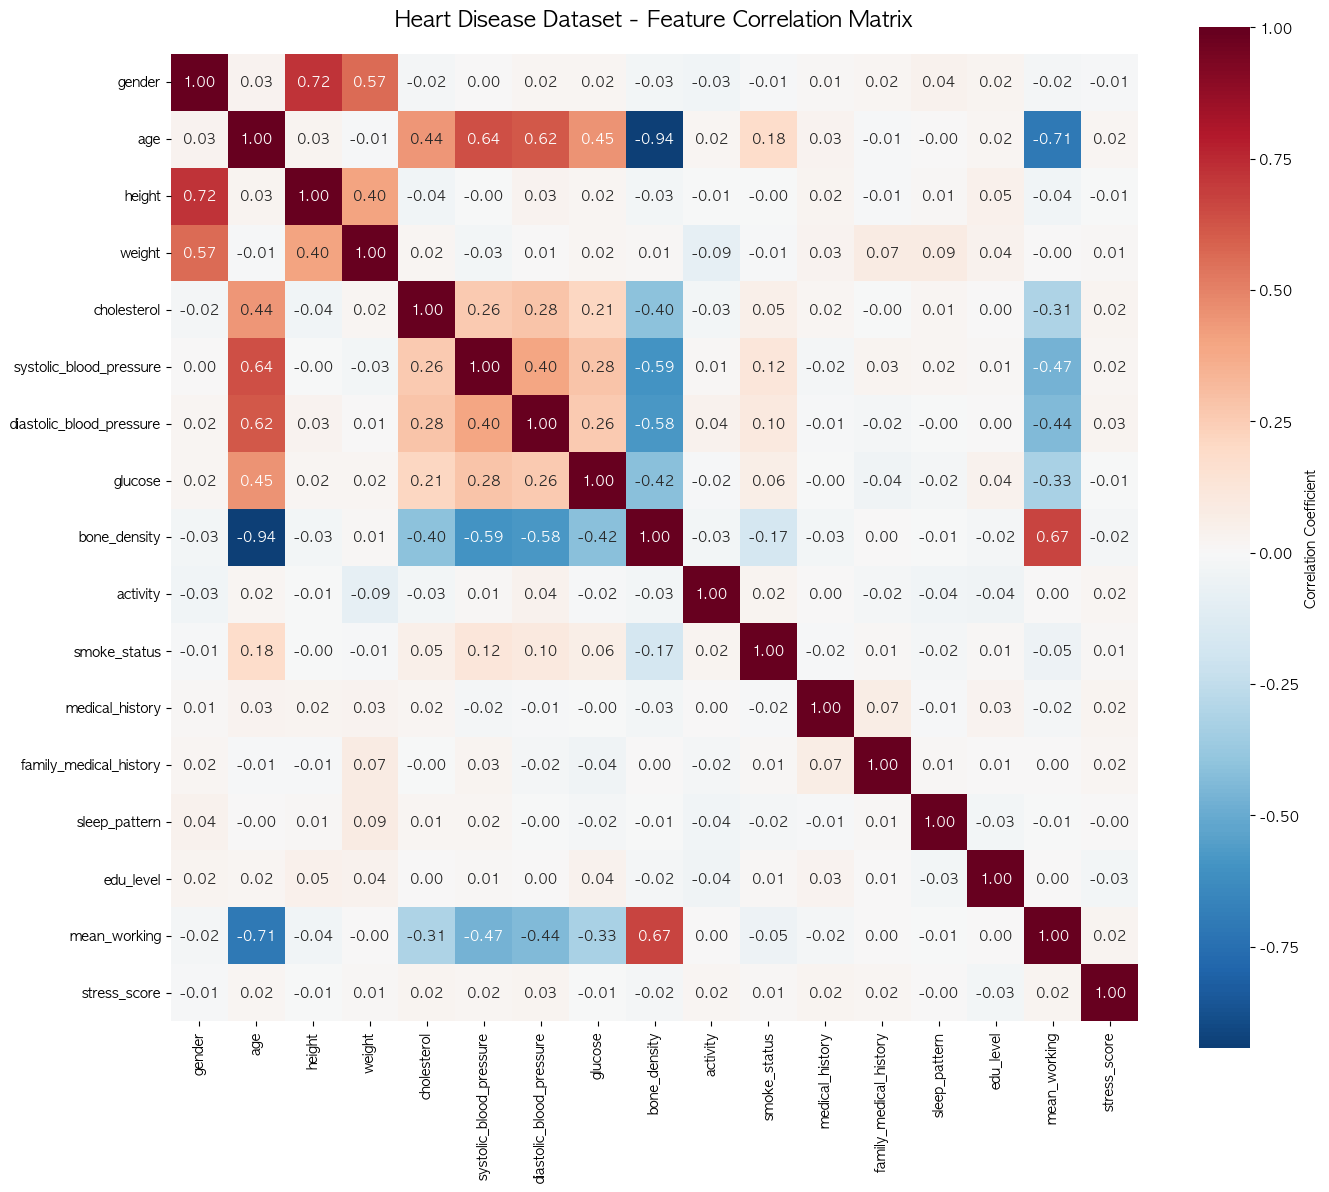

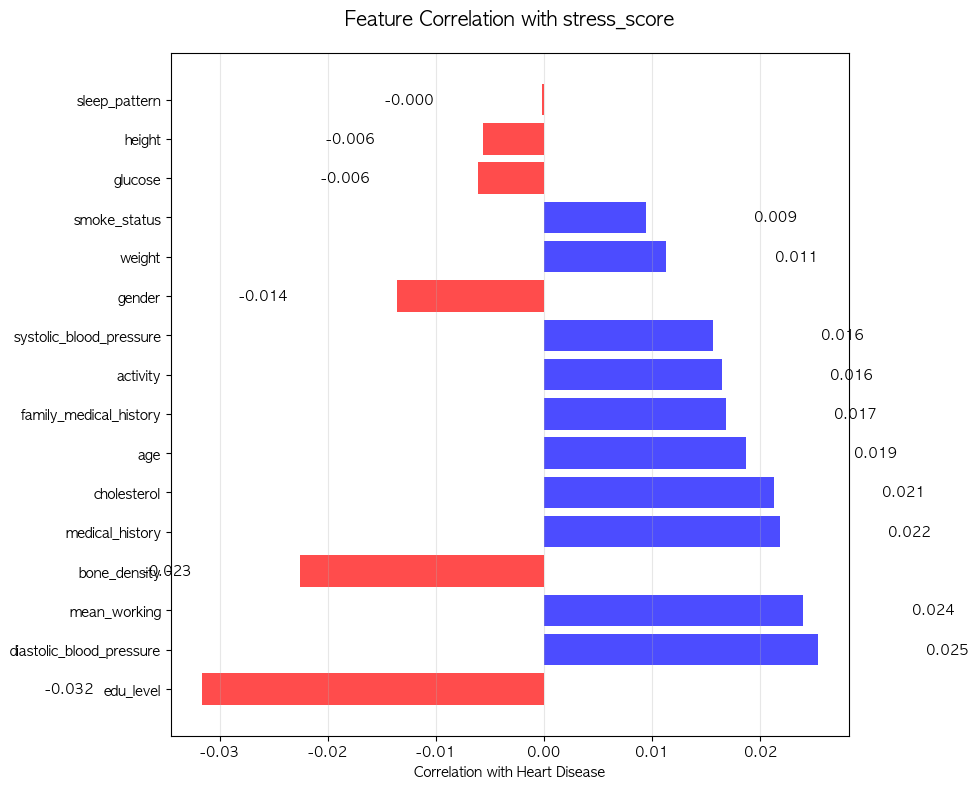

stress_score 와 각 특성간의 상관관계:
edu_level                 : -0.032 (약한 음의 상관관계)
diastolic_blood_pressure  :  0.025 (약한 양의 상관관계)
mean_working              :  0.024 (약한 양의 상관관계)
bone_density              : -0.023 (약한 음의 상관관계)
medical_history           :  0.022 (약한 양의 상관관계)
cholesterol               :  0.021 (약한 양의 상관관계)
age                       :  0.019 (약한 양의 상관관계)
family_medical_history    :  0.017 (약한 양의 상관관계)
activity                  :  0.016 (약한 양의 상관관계)
systolic_blood_pressure   :  0.016 (약한 양의 상관관계)
gender                    : -0.014 (약한 음의 상관관계)
weight                    :  0.011 (약한 양의 상관관계)
smoke_status              :  0.009 (약한 양의 상관관계)
glucose                   : -0.006 (약한 음의 상관관계)
height                    : -0.006 (약한 음의 상관관계)
sleep_pattern             : -0.000 (약한 음의 상관관계)


In [164]:
# Heart Disease 상관관계 분석
import matplotlib.pyplot as plt
import seaborn as sns


target_col = 'stress_score'

# 전체 데이터셋에 타겟 변수 포함하여 상관관계 계산
df_corr = df.copy()
df_corr[target_col] = y

# 상관관계 행렬 계산
correlation_matrix = df_corr.corr()

# 1. 전체 상관관계 히트맵
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Heart Disease Dataset - Feature Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# 2. stress_score와의 상관관계만 따로 시각화
stress_score_corr = correlation_matrix[target_col].drop(target_col).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 8))
colors = ['red' if x < 0 else 'blue' for x in stress_score_corr.values]
bars = plt.barh(range(len(stress_score_corr)), stress_score_corr.values, color=colors, alpha=0.7)
plt.yticks(range(len(stress_score_corr)), stress_score_corr.index)
plt.xlabel('Correlation with Heart Disease')
plt.title('Feature Correlation with stress_score', fontsize=14, pad=20)
plt.grid(axis='x', alpha=0.3)

# 막대 위에 상관계수 값 표시
for i, (bar, value) in enumerate(zip(bars, stress_score_corr.values)):
    plt.text(value + (0.01 if value >= 0 else -0.01), i, f'{value:.3f}', 
             va='center', ha='left' if value >= 0 else 'right', fontweight='bold')

plt.tight_layout()
plt.show()

# 3. 상관관계 수치 출력
print("stress_score 와 각 특성간의 상관관계:")
print("=" * 50)
for feature, corr_value in stress_score_corr.items():
    direction = "양의 상관관계" if corr_value > 0 else "음의 상관관계"
    strength = "강한" if abs(corr_value) > 0.5 else "중간" if abs(corr_value) > 0.3 else "약한"
    print(f"{feature:25} : {corr_value:6.3f} ({strength} {direction})")

# 모델 학습

In [ ]:
df_feature = df.copy()
# df_feature = df_feature.drop(['glucose', 'height'], axis=1)

X = df_feature.copy()
y = y
# 5. 학습/테스트 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 6. 공통 평가 및 시각화 함수



🚀 앙상블 & MLP 모델 - 원본/표준화 데이터 비교 분석
📊 데이터 정보:
  - 훈련 데이터: (2400, 14)
  - 테스트 데이터: (600, 14)
  - 특성 수: 14

🎯 총 15개 모델 학습 시작...
--------------------------------------------------------------------------------

[ 1/15] 🔄 Random Forest (원본) 학습 중...
    ✅ 완료 - RMSE: 0.2346, R²: 0.3030 (Original)

[ 2/15] 🔄 Gradient Boosting (원본) 학습 중...
    ✅ 완료 - RMSE: 0.2696, R²: 0.0800 (Original)

[ 3/15] 🔄 Extra Trees (원본) 학습 중...
    ✅ 완료 - RMSE: 0.2237, R²: 0.3664 (Original)

[ 4/15] 🔄 AdaBoost (원본) 학습 중...
    ✅ 완료 - RMSE: 0.2754, R²: 0.0400 (Original)

[ 5/15] 🔄 Voting Ensemble (원본) 학습 중...
    ✅ 완료 - RMSE: 0.2355, R²: 0.2976 (Original)

[ 6/15] 🔄 Stacking Ensemble (원본) 학습 중...
    ✅ 완료 - RMSE: 0.2239, R²: 0.3653 (Original)

[ 7/15] 🔄 Random Forest (표준화) 학습 중...
    ✅ 완료 - RMSE: 0.2345, R²: 0.3037 (Scaled)

[ 8/15] 🔄 Gradient Boosting (표준화) 학습 중...
    ✅ 완료 - RMSE: 0.2696, R²: 0.0800 (Scaled)

[ 9/15] 🔄 Extra Trees (표준화) 학습 중...
    ✅ 완료 - RMSE: 0.2245, R²: 0.3618 (Scaled)

[10/15] 🔄 AdaBoost (표준화) 학습

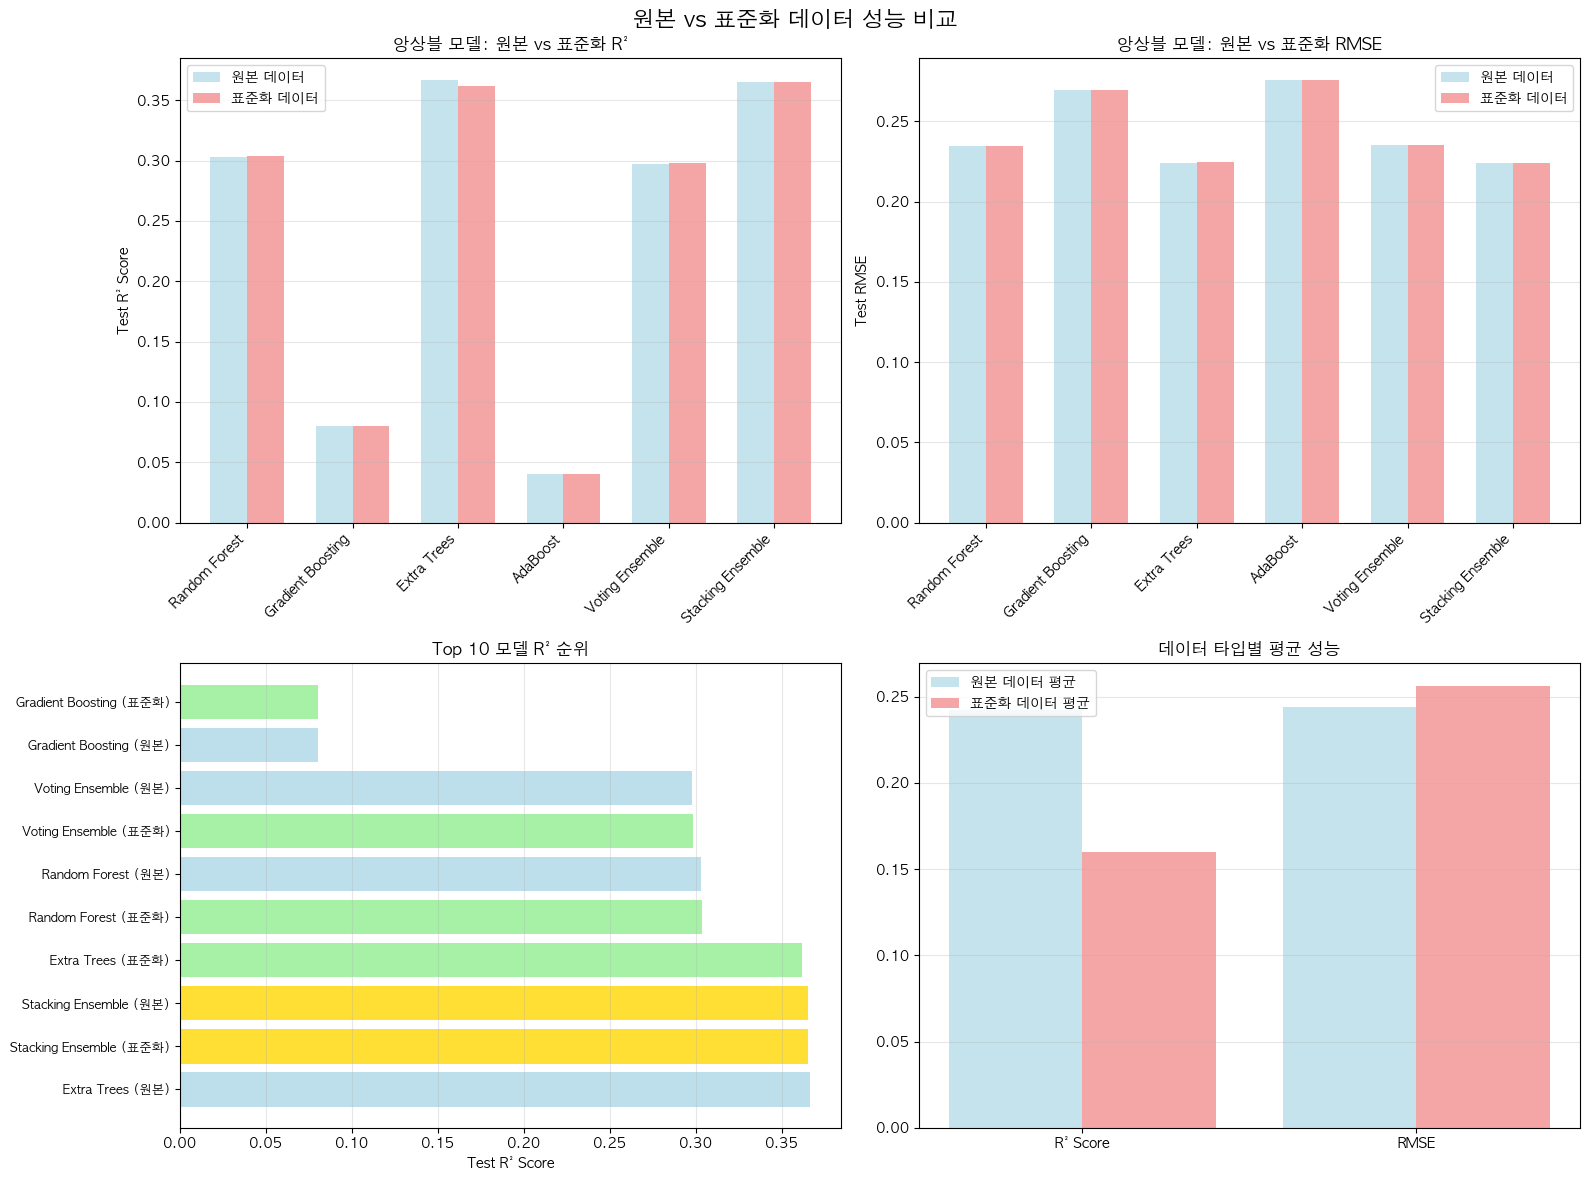


🎯 전체 모델 성능 순위 (Test R² 기준):
   1. 🌳 Extra Trees (원본)          (Original) - RMSE: 0.2237, R²: 0.3664
   2. 🏆 Stacking Ensemble (표준화)   (Scaled)   - RMSE: 0.2239, R²: 0.3655
   3. 🏆 Stacking Ensemble (원본)    (Original) - RMSE: 0.2239, R²: 0.3653
   4. 📊 Extra Trees (표준화)         (Scaled)   - RMSE: 0.2245, R²: 0.3618
   5. 📊 Random Forest (표준화)       (Scaled)   - RMSE: 0.2345, R²: 0.3037
   6. 🌳 Random Forest (원본)        (Original) - RMSE: 0.2346, R²: 0.3030
   7. 📊 Voting Ensemble (표준화)     (Scaled)   - RMSE: 0.2354, R²: 0.2984
   8. 🌳 Voting Ensemble (원본)      (Original) - RMSE: 0.2355, R²: 0.2976
   9. 🌳 Gradient Boosting (원본)    (Original) - RMSE: 0.2696, R²: 0.0800
  10. 📊 Gradient Boosting (표준화)   (Scaled)   - RMSE: 0.2696, R²: 0.0800
  11. 🌳 AdaBoost (원본)             (Original) - RMSE: 0.2754, R²: 0.0400
  12. 📊 AdaBoost (표준화)            (Scaled)   - RMSE: 0.2754, R²: 0.0400
  13. 🧠 MLP Medium                (Scaled)   - RMSE: 0.2776, R²: 0.0246
  14. 🧠 MLP Deep                  (

In [163]:
# 앙상블 모델과 MLP 모델 통합 학습 및 평가 (표준화 데이터 포함)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, ExtraTreesRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("🚀 앙상블 & MLP 모델 - 원본/표준화 데이터 비교 분석")
print("="*80)

# 데이터 준비
# X = df.drop('stress_score', axis=1)
# y = df['stress_score']

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"📊 데이터 정보:")
print(f"  - 훈련 데이터: {X_train.shape}")
print(f"  - 테스트 데이터: {X_test.shape}")
print(f"  - 특성 수: {X.shape[1]}")

# 모델 정의 - 원본 데이터와 표준화 데이터 모두 테스트
models_config = {
    # === 앙상블 모델들 (원본 데이터) ===
    'RF_Original': {
        'model': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
        'scaled': False,
        'display_name': 'Random Forest (원본)'
    },
    'GB_Original': {
        'model': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'scaled': False,
        'display_name': 'Gradient Boosting (원본)'
    },
    'ET_Original': {
        'model': ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1),
        'scaled': False,
        'display_name': 'Extra Trees (원본)'
    },
    'Ada_Original': {
        'model': AdaBoostRegressor(n_estimators=100, random_state=42),
        'scaled': False,
        'display_name': 'AdaBoost (원본)'
    },
    'Voting_Original': {
        'model': VotingRegressor([
            ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
            ('gb', GradientBoostingRegressor(n_estimators=50, random_state=42)),
            ('et', ExtraTreesRegressor(n_estimators=50, random_state=42))
        ]),
        'scaled': False,
        'display_name': 'Voting Ensemble (원본)'
    },
    'Stacking_Original': {
        'model': StackingRegressor(
            estimators=[
                ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
                ('gb', GradientBoostingRegressor(n_estimators=50, random_state=42)),
                ('et', ExtraTreesRegressor(n_estimators=50, random_state=42)),
                ('ada', AdaBoostRegressor(n_estimators=50, random_state=42))
            ],
            final_estimator=LinearRegression(),
            cv=5,
            n_jobs=-1
        ),
        'scaled': False,
        'display_name': 'Stacking Ensemble (원본)'
    },
    
    # === 앙상블 모델들 (표준화 데이터) ===
    'RF_Scaled': {
        'model': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
        'scaled': True,
        'display_name': 'Random Forest (표준화)'
    },
    'GB_Scaled': {
        'model': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'scaled': True,
        'display_name': 'Gradient Boosting (표준화)'
    },
    'ET_Scaled': {
        'model': ExtraTreesRegressor(n_estimators=139, random_state=42, n_jobs=-1),
        'scaled': True,
        'display_name': 'Extra Trees (표준화)'
    },
    'Ada_Scaled': {
        'model': AdaBoostRegressor(n_estimators=100, random_state=42),
        'scaled': True,
        'display_name': 'AdaBoost (표준화)'
    },
    'Voting_Scaled': {
        'model': VotingRegressor([
            ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
            ('gb', GradientBoostingRegressor(n_estimators=50, random_state=42)),
            ('et', ExtraTreesRegressor(n_estimators=50, random_state=42))
        ]),
        'scaled': True,
        'display_name': 'Voting Ensemble (표준화)'
    },
    'Stacking_Scaled': {
        'model': StackingRegressor(
            estimators=[
                ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
                ('gb', GradientBoostingRegressor(n_estimators=50, random_state=42)),
                ('et', ExtraTreesRegressor(n_estimators=50, random_state=42)),
                ('ada', AdaBoostRegressor(n_estimators=50, random_state=42))
            ],
            final_estimator=LinearRegression(),
            cv=5,
            n_jobs=-1
        ),
        'scaled': True,
        'display_name': 'Stacking Ensemble (표준화)'
    },
    
    # === MLP 신경망 모델들 (표준화 데이터만) ===
    'MLP_Shallow': {
        'model': MLPRegressor(hidden_layer_sizes=(100,), max_iter=2000, random_state=42),
        'scaled': True,
        'display_name': 'MLP Shallow'
    },
    'MLP_Medium': {
        'model': MLPRegressor(hidden_layer_sizes=(150, 75), max_iter=2000, random_state=42),
        'scaled': True,
        'display_name': 'MLP Medium'
    },
    'MLP_Deep': {
        'model': MLPRegressor(hidden_layer_sizes=(200, 100, 50), max_iter=2000, random_state=42),
        'scaled': True,
        'display_name': 'MLP Deep'
    }
}

# 모든 모델 학습 및 평가
results = {}
model_objects = {}

print(f"\n🎯 총 {len(models_config)}개 모델 학습 시작...")
print("-" * 80)

for i, (name, config) in enumerate(models_config.items(), 1):
    display_name = config.get('display_name', name)
    print(f"\n[{i:2d}/{len(models_config)}] 🔄 {display_name} 학습 중...")
    
    model = config['model']
    use_scaled = config['scaled']
    
    # 데이터 선택
    if use_scaled:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
        data_type = "Scaled"
    else:
        X_train_use = X_train
        X_test_use = X_test
        data_type = "Original"
    
    try:
        # 모델 학습
        model.fit(X_train_use, y_train)
        
        # 예측
        y_pred_train = model.predict(X_train_use)
        y_pred_test = model.predict(X_test_use)
        
        # 평가지표 계산
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        
        # 오버피팅 정도 계산
        overfitting_gap = test_rmse - train_rmse
        
        # 모델 타입 분류
        if 'MLP' in name:
            model_type = 'Neural Network'
        else:
            model_type = 'Ensemble'
        
        # 결과 저장 (숫자형으로 명시적 저장)
        results[display_name] = {
            'Model Type': model_type,
            'Data Used': data_type,
            'Train RMSE': float(train_rmse),
            'Test RMSE': float(test_rmse),
            'Train R²': float(train_r2),
            'Test R²': float(test_r2),
            'RMSE Gap': float(overfitting_gap),
            'Performance Score': float(test_r2 - (overfitting_gap * 0.1))
        }
        
        model_objects[display_name] = model
        
        print(f"    ✅ 완료 - RMSE: {test_rmse:.4f}, R²: {test_r2:.4f} ({data_type})")
        
    except Exception as e:
        print(f"    ❌ 오류 발생: {str(e)}")
        continue

# 결과를 DataFrame으로 정리
results_df = pd.DataFrame(results).T

# 수치형 컬럼들을 명시적으로 변환
numeric_columns = ['Train RMSE', 'Test RMSE', 'Train R²', 'Test R²', 'RMSE Gap', 'Performance Score']
for col in numeric_columns:
    results_df[col] = pd.to_numeric(results_df[col], errors='coerce')

results_df = results_df.round(4)

print(f"\n" + "="*80)
print("📊 전체 모델 성능 비교 결과")
print("="*80)
print(results_df[['Model Type', 'Data Used', 'Test RMSE', 'Test R²', 'RMSE Gap']])

# 원본 vs 표준화 데이터 비교 분석
print(f"\n🔍 원본 vs 표준화 데이터 성능 비교:")
print("-" * 60)

ensemble_models = ['Random Forest', 'Gradient Boosting', 'Extra Trees', 'AdaBoost', 'Voting Ensemble', 'Stacking Ensemble']

for model_base in ensemble_models:
    original_key = f"{model_base} (원본)"
    scaled_key = f"{model_base} (표준화)"
    
    if original_key in results_df.index and scaled_key in results_df.index:
        orig_r2 = results_df.loc[original_key, 'Test R²']
        scaled_r2 = results_df.loc[scaled_key, 'Test R²']
        orig_rmse = results_df.loc[original_key, 'Test RMSE']
        scaled_rmse = results_df.loc[scaled_key, 'Test RMSE']
        
        r2_diff = scaled_r2 - orig_r2
        rmse_diff = scaled_rmse - orig_rmse
        
        better_data = "표준화" if r2_diff > 0 else "원본"
        print(f"{model_base:20} | 원본 R²: {orig_r2:.4f} | 표준화 R²: {scaled_r2:.4f} | 차이: {r2_diff:+.4f} | {better_data} 승리")

# 최고 성능 모델들 찾기
best_rmse_model = results_df['Test RMSE'].idxmin()
best_r2_model = results_df['Test R²'].idxmax()
best_overall_model = results_df['Performance Score'].idxmax()

print(f"\n🏆 최고 성능 모델들:")
print(f"  🥇 최저 RMSE: {best_rmse_model}")
print(f"     - Test RMSE: {results_df.loc[best_rmse_model, 'Test RMSE']:.4f}")
print(f"     - Test R²: {results_df.loc[best_rmse_model, 'Test R²']:.4f}")
print(f"  🥇 최고 R²: {best_r2_model}")
print(f"     - Test RMSE: {results_df.loc[best_r2_model, 'Test RMSE']:.4f}")
print(f"     - Test R²: {results_df.loc[best_r2_model, 'Test R²']:.4f}")

# 성능 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('원본 vs 표준화 데이터 성능 비교', fontsize=16, fontweight='bold')

# 1. Test R² 비교 (원본 vs 표준화)
ax1 = axes[0, 0]
original_models = results_df[results_df['Data Used'] == 'Original']
scaled_models = results_df[results_df['Data Used'] == 'Scaled']

# 앙상블 모델만 비교 (원본/표준화 둘 다 있는 것)
ensemble_original = original_models[original_models['Model Type'] == 'Ensemble']
ensemble_scaled = scaled_models[scaled_models['Model Type'] == 'Ensemble']

if len(ensemble_original) > 0 and len(ensemble_scaled) > 0:
    x = np.arange(len(ensemble_original))
    width = 0.35
    
    ax1.bar(x - width/2, ensemble_original['Test R²'], width, label='원본 데이터', alpha=0.7, color='lightblue')
    ax1.bar(x + width/2, ensemble_scaled['Test R²'], width, label='표준화 데이터', alpha=0.7, color='lightcoral')
    
    ax1.set_title('앙상블 모델: 원본 vs 표준화 R²', fontweight='bold')
    ax1.set_ylabel('Test R² Score')
    ax1.set_xticks(x)
    ax1.set_xticklabels([name.replace(' (원본)', '') for name in ensemble_original.index], rotation=45, ha='right')
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)

# 2. RMSE 비교
ax2 = axes[0, 1]
if len(ensemble_original) > 0 and len(ensemble_scaled) > 0:
    ax2.bar(x - width/2, ensemble_original['Test RMSE'], width, label='원본 데이터', alpha=0.7, color='lightblue')
    ax2.bar(x + width/2, ensemble_scaled['Test RMSE'], width, label='표준화 데이터', alpha=0.7, color='lightcoral')
    
    ax2.set_title('앙상블 모델: 원본 vs 표준화 RMSE', fontweight='bold')
    ax2.set_ylabel('Test RMSE')
    ax2.set_xticks(x)
    ax2.set_xticklabels([name.replace(' (원본)', '') for name in ensemble_original.index], rotation=45, ha='right')
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)

# 3. 전체 모델 R² 순위
ax3 = axes[1, 0]
top_10_models = results_df.nlargest(10, 'Test R²')
colors = ['gold' if 'Stacking' in idx else 'lightcoral' if 'MLP' in idx else 'lightgreen' if '표준화' in idx else 'lightblue' for idx in top_10_models.index]

bars = ax3.barh(range(len(top_10_models)), top_10_models['Test R²'], color=colors, alpha=0.8)
ax3.set_title('Top 10 모델 R² 순위', fontweight='bold')
ax3.set_xlabel('Test R² Score')
ax3.set_yticks(range(len(top_10_models)))
ax3.set_yticklabels(top_10_models.index, fontsize=9)
ax3.grid(axis='x', alpha=0.3)

# 4. 데이터 타입별 평균 성능
ax4 = axes[1, 1]
original_avg_r2 = original_models['Test R²'].mean()
scaled_avg_r2 = scaled_models['Test R²'].mean()
original_avg_rmse = original_models['Test RMSE'].mean()
scaled_avg_rmse = scaled_models['Test RMSE'].mean()

categories = ['R² Score', 'RMSE']
original_scores = [original_avg_r2, original_avg_rmse]
scaled_scores = [scaled_avg_r2, scaled_avg_rmse]

x_pos = np.arange(len(categories))
ax4.bar(x_pos - 0.2, original_scores, 0.4, label='원본 데이터 평균', alpha=0.7, color='lightblue')
ax4.bar(x_pos + 0.2, scaled_scores, 0.4, label='표준화 데이터 평균', alpha=0.7, color='lightcoral')
ax4.set_title('데이터 타입별 평균 성능', fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(categories)
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 성능 순위
print(f"\n🎯 전체 모델 성능 순위 (Test R² 기준):")
ranking = results_df.sort_values('Test R²', ascending=False)
for i, (model, row) in enumerate(ranking.iterrows(), 1):
    if 'Stacking' in model:
        model_type_emoji = "🏆"
    elif 'MLP' in model:
        model_type_emoji = "🧠"
    elif '표준화' in model:
        model_type_emoji = "📊"
    else:
        model_type_emoji = "🌳"
    
    data_indicator = f"({row['Data Used']})"
    print(f"  {i:2d}. {model_type_emoji} {model:25} {data_indicator:10} - RMSE: {row['Test RMSE']:.4f}, R²: {row['Test R²']:.4f}")

print(f"\n" + "="*80)
print("✅ 원본/표준화 데이터 비교 분석 완료!")
print("="*80)